In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [7]:
# to ignore mistakes
from warnings import filterwarnings
filterwarnings('ignore')

# K-En Yakın Komşu

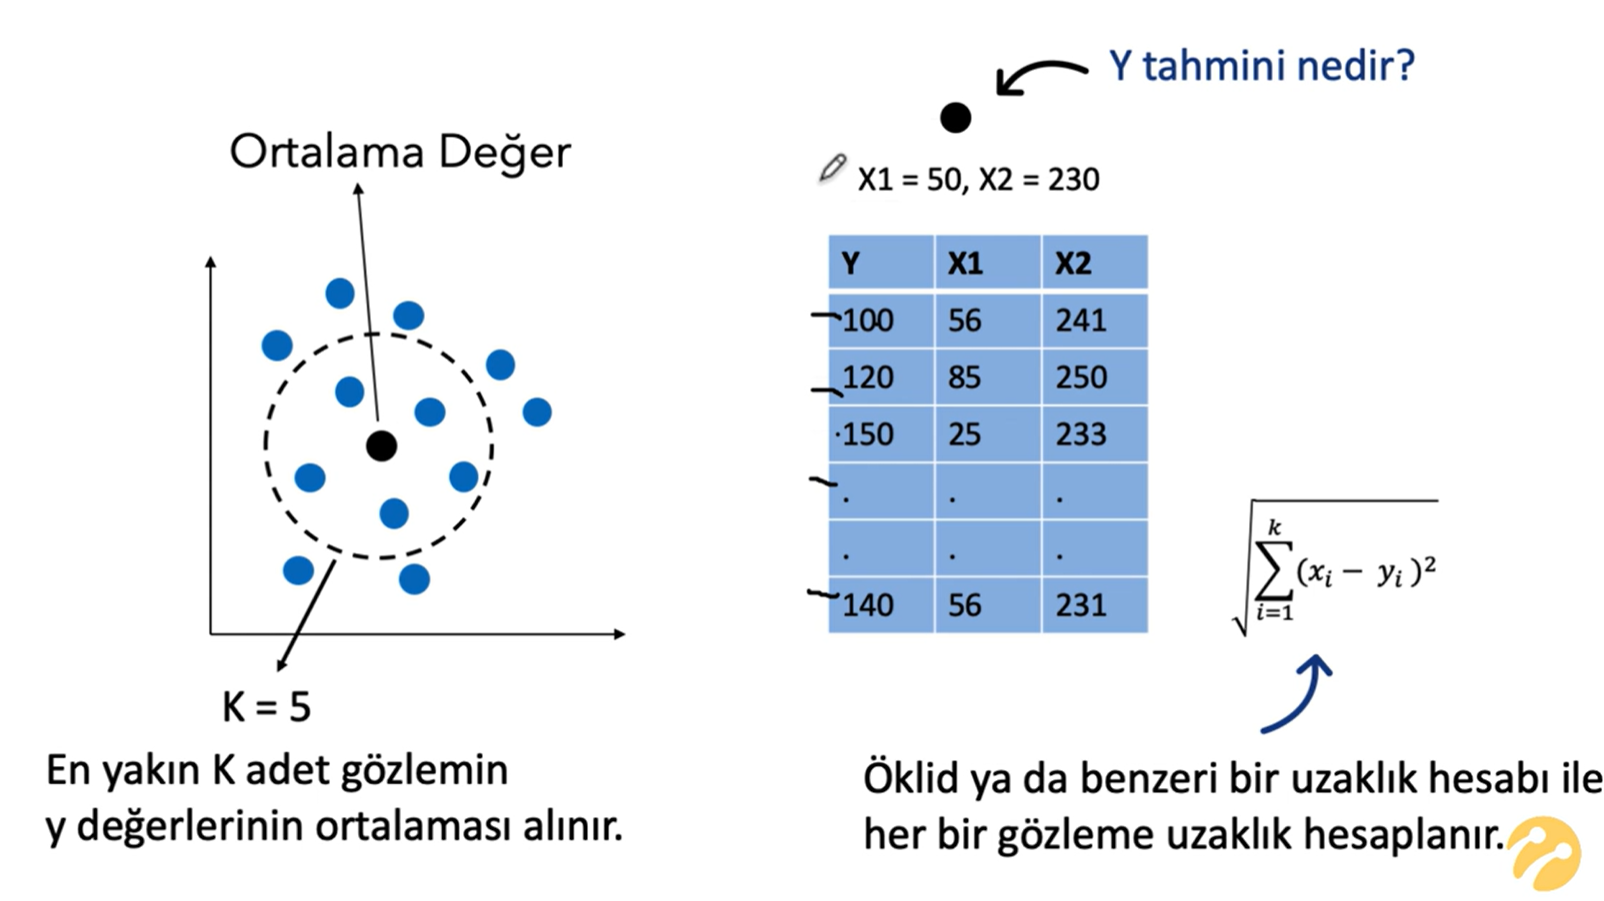

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [9]:
knn_model= KNeighborsRegressor().fit(x_train,y_train)

In [13]:
knn_model

KNeighborsRegressor()

In [10]:
knn_model.n_neighbors

5

In [15]:
knn_model.metric

'minkowski'

In [21]:
dir(knn_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_validate_params',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'feature_name

In [19]:
y_pred = knn_model.predict(x_test)

In [20]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

In [24]:
RMSE = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=",k,"için RMSE değeri:",rmse)

k= 1 için RMSE değeri: 455.03925390751965
k= 2 için RMSE değeri: 415.99629571490965
k= 3 için RMSE değeri: 420.6765370082348
k= 4 için RMSE değeri: 428.8564674588792
k= 5 için RMSE değeri: 426.6570764525201
k= 6 için RMSE değeri: 423.5071669008732
k= 7 için RMSE değeri: 414.9361222421057
k= 8 için RMSE değeri: 413.7094731463598
k= 9 için RMSE değeri: 417.84419990871265
k= 10 için RMSE değeri: 421.6252180741266


In [25]:
#GridSearchCV

In [26]:
knn_params= {"n_neighbors": np.arange(1,30,1)}

In [ ]:
knn = KNeighborsRegressor()

In [33]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(x_train,y_train) 

In [35]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [37]:
# final model
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(x_train,y_train)

In [39]:
y_pred=knn_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

# Support Vector Regression

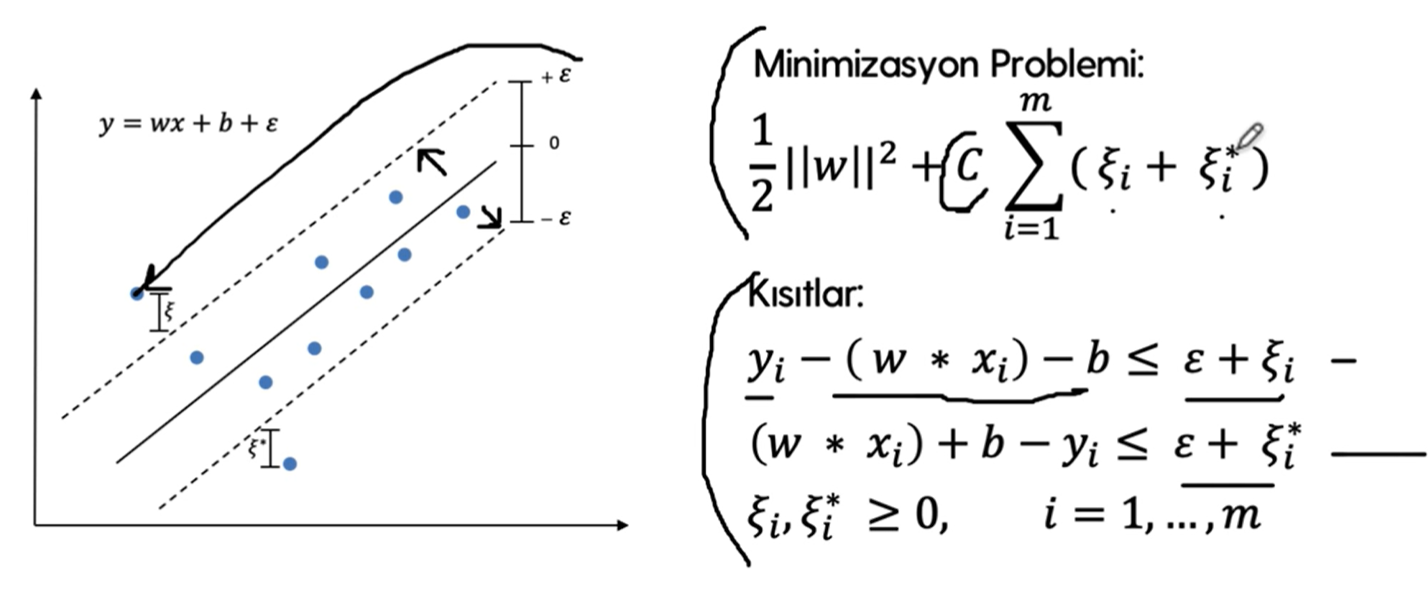

In [78]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [52]:
svr_model = SVR(kernel="linear").fit(x_train, y_train)

In [ ]:
#svr_model = SVR(kernel="rbf").fit(x_train, y_train)  rbf : doğrusal olmayan 

In [54]:
svr_model

SVR(kernel='linear')

In [56]:
svr_model.predict(x_train)[0:5]

array([219.32622627, 702.43039317, 623.20559641, 153.77538484,
       463.15191157])

In [58]:
svr_model.intercept_

array([-80.15196063])

In [60]:
svr_model.coef_

array([[ -1.2183904 ,   6.09602978,  -3.67574533,   0.14217072,
          0.51435925,   1.28388992,  12.55922527,  -0.08693754,
          0.46597185,   2.98259931,   0.52944513,  -0.79820793,
         -0.16015531,   0.30872795,   0.28842348,  -1.79560066,
          6.41868986, -10.74313785,   1.33374319]])

In [62]:
y_pred = svr_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.0408415795005

In [64]:
svr_params = {"C": [0.1,0.5,1,3]}

In [68]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5,verbose=2,n_jobs=-1).fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [69]:
svr_cv_model.best_params_

{'C': 0.5}

In [73]:
svr_tuned =  SVR(kernel="linear", C = 0.5).fit(x_train, y_train)

In [75]:
y_pred = svr_model.predict(x_test)

In [77]:
np.sqrt(mean_squared_error(y_test,y_pred))

370.0408415795005

# Yapay Sinir Ağaçları

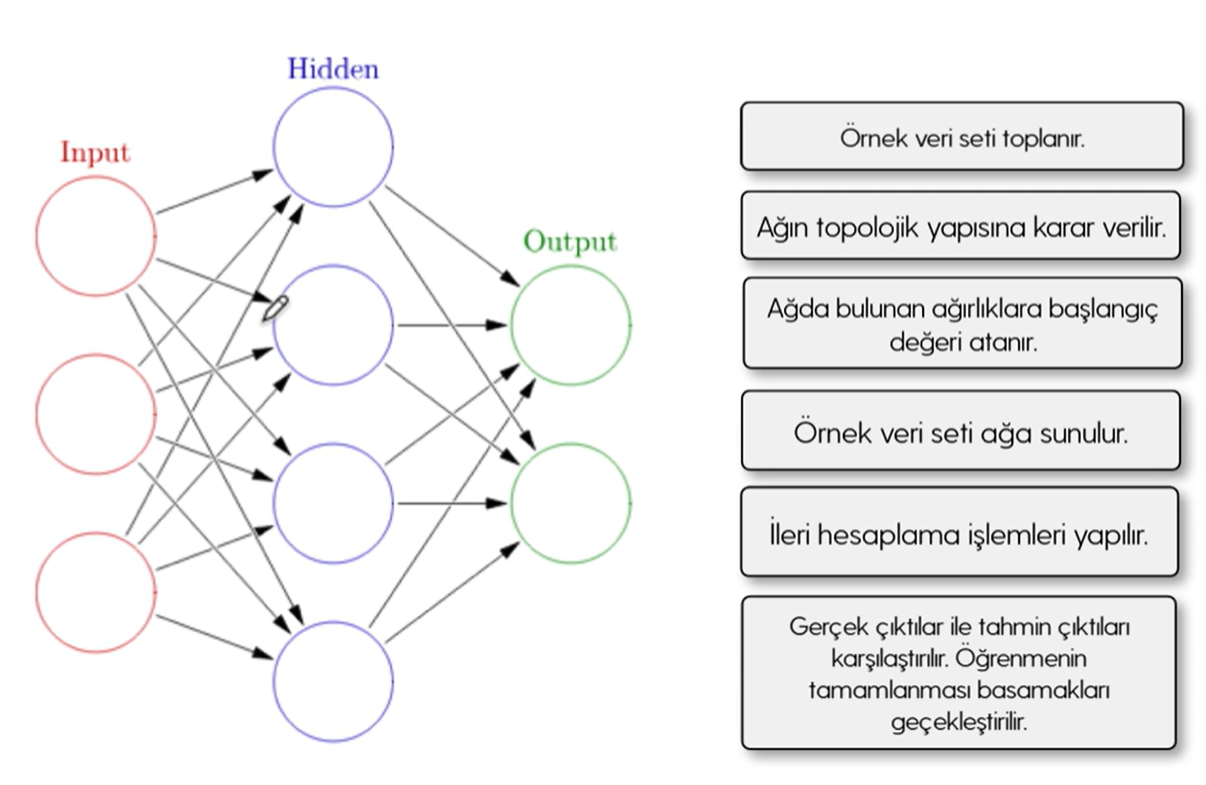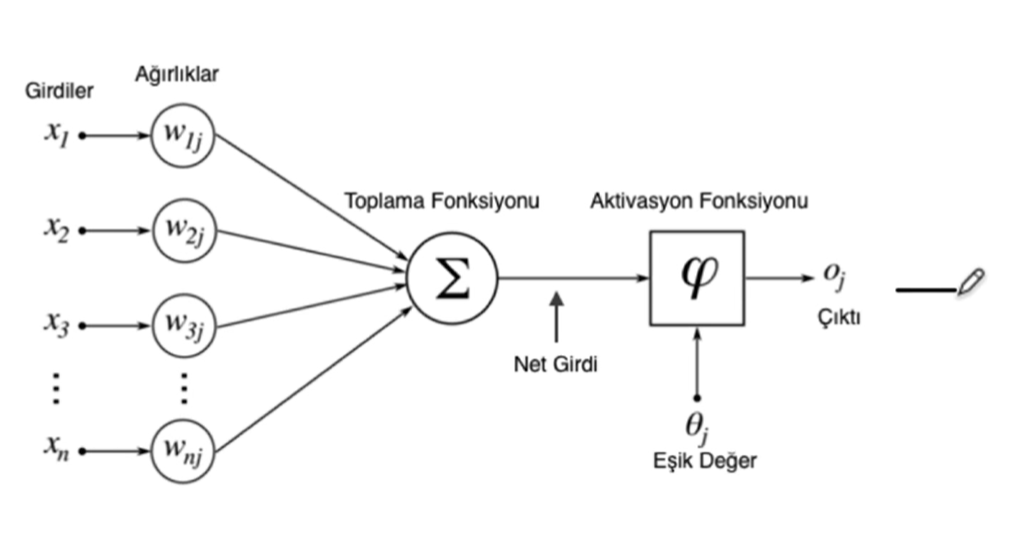

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [20]:
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [21]:
mlp_model = MLPRegressor().fit(x_train_scaled,y_train)

In [22]:
y_pred = mlp_model.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

653.061633563396

In [25]:
mlp_params = {"alpha": [0.1,0.01,0.2,0.001,0.0001],
             "hidden_layer_sizes": [(10,2),(5,5),(100,100)]}

In [34]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=10, verbose=2,n_jobs=-1).fit(x_train_scaled,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [35]:
mlp_cv_model.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}

In [36]:
# final
mlp_tuned = MLPRegressor(alpha = 0.01 , hidden_layer_sizes = (100,100)).fit(x_train_scaled,y_train)

In [37]:
y_pred = mlp_tuned.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

362.64785445631856

# CART

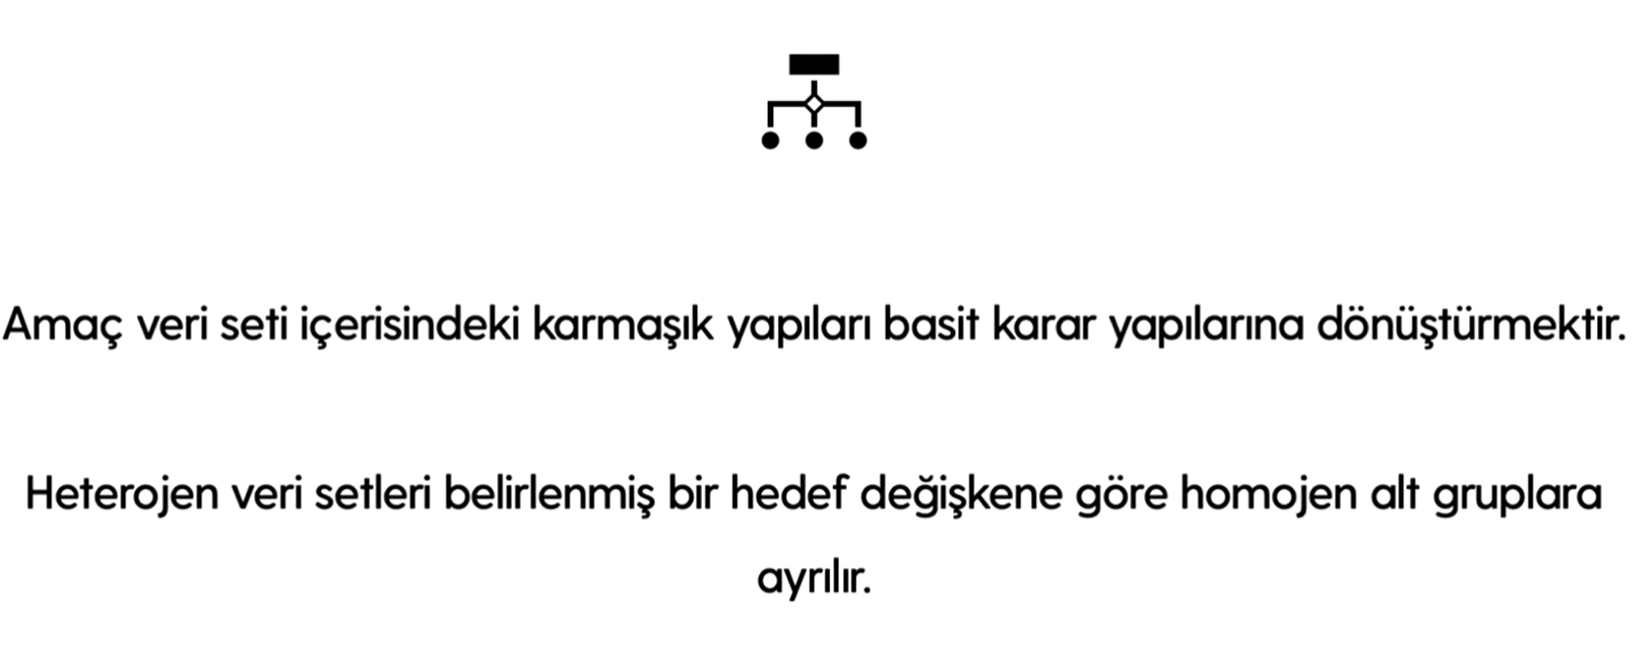

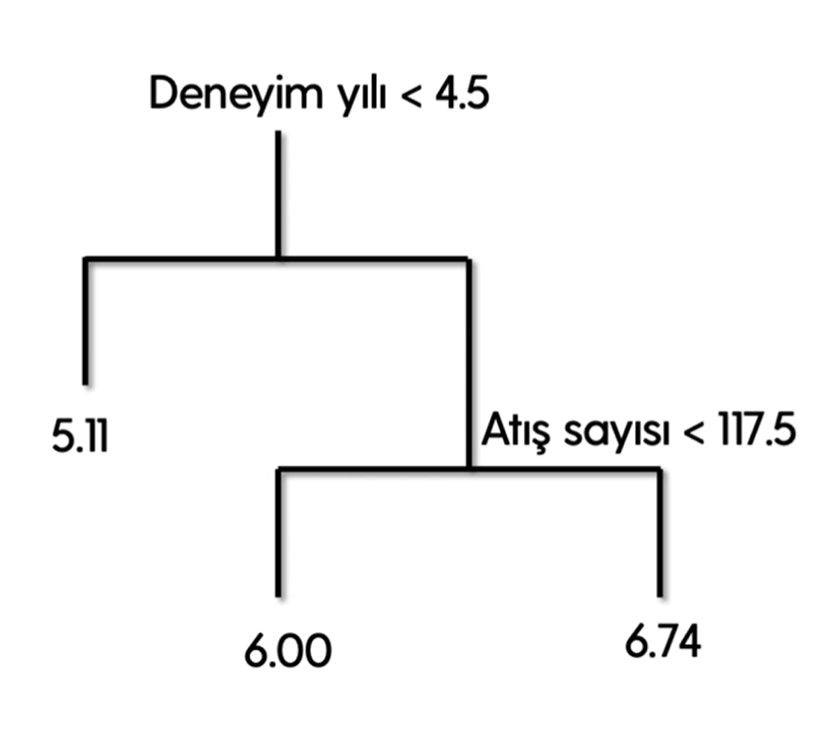

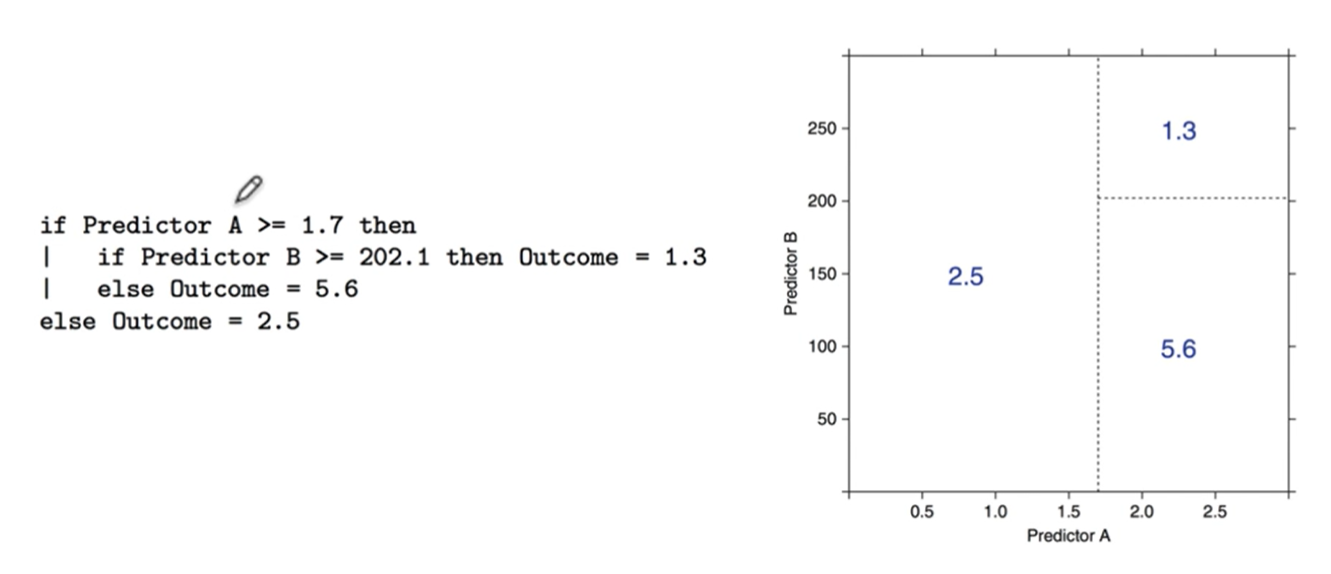

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [4]:
x_train = pd.DataFrame(x_train["Hits"])
x_test = pd.DataFrame(x_test["Hits"])

In [19]:
## model ve tahmin
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [21]:
cart_model.fit(x_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

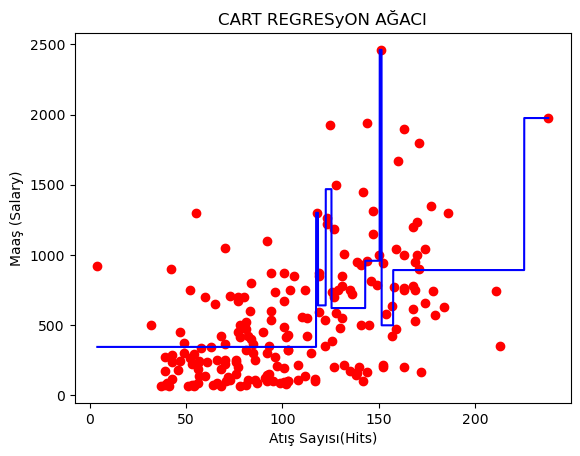

In [22]:
x_grid = np.arange(min(np.array(x_train)),max(np.array(x_train)),0.01)
x_grid = x_grid.reshape((len(x_grid),1))

plt.scatter(x_train,y_train,color='red')

plt.plot(x_grid,cart_model.predict(x_grid),color='blue')

plt.title('CART REGRESyON AĞACI')
plt.xlabel('Atış Sayısı(Hits)')
plt.ylabel('Maaş (Salary)') ;

In [23]:
#tek değişkenli tahmin
y_pred= cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [36]:
# tüm değişkenler
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [67]:
cart_model = DecisionTreeRegressor().fit(x_train,y_train)

In [68]:
y_pred= cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

449.24586166295165

In [69]:
cart_model = DecisionTreeRegressor().fit(x_train,y_train)
y_pred= cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

464.101353569014

In [70]:
?cart_model

In [71]:
cart_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split" : [2,10,5,30,50,100]}

In [72]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(x_train,y_train)

In [73]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [74]:
# final model
cart_model_tuned= DecisionTreeRegressor(max_depth = 10 ,min_samples_split= 50).fit(x_train,y_train)

In [76]:
y_pred= cart_model_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434

# Random Forests

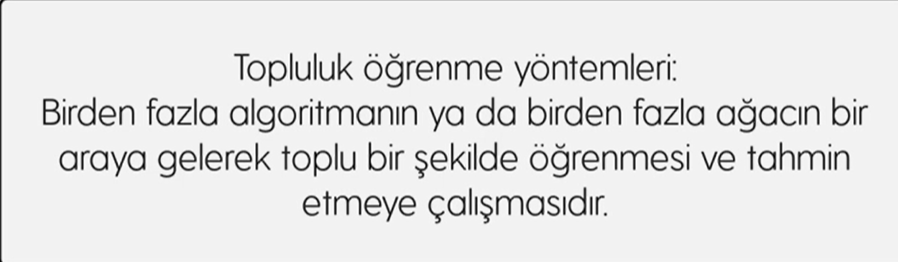

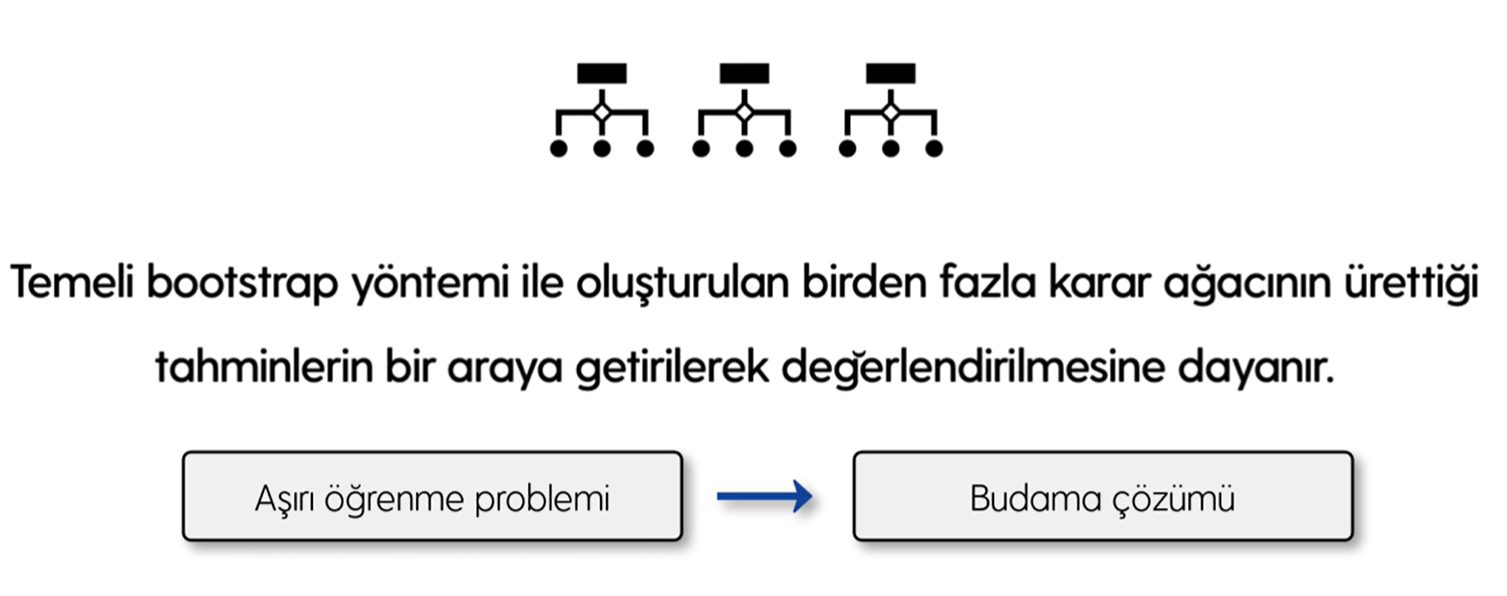

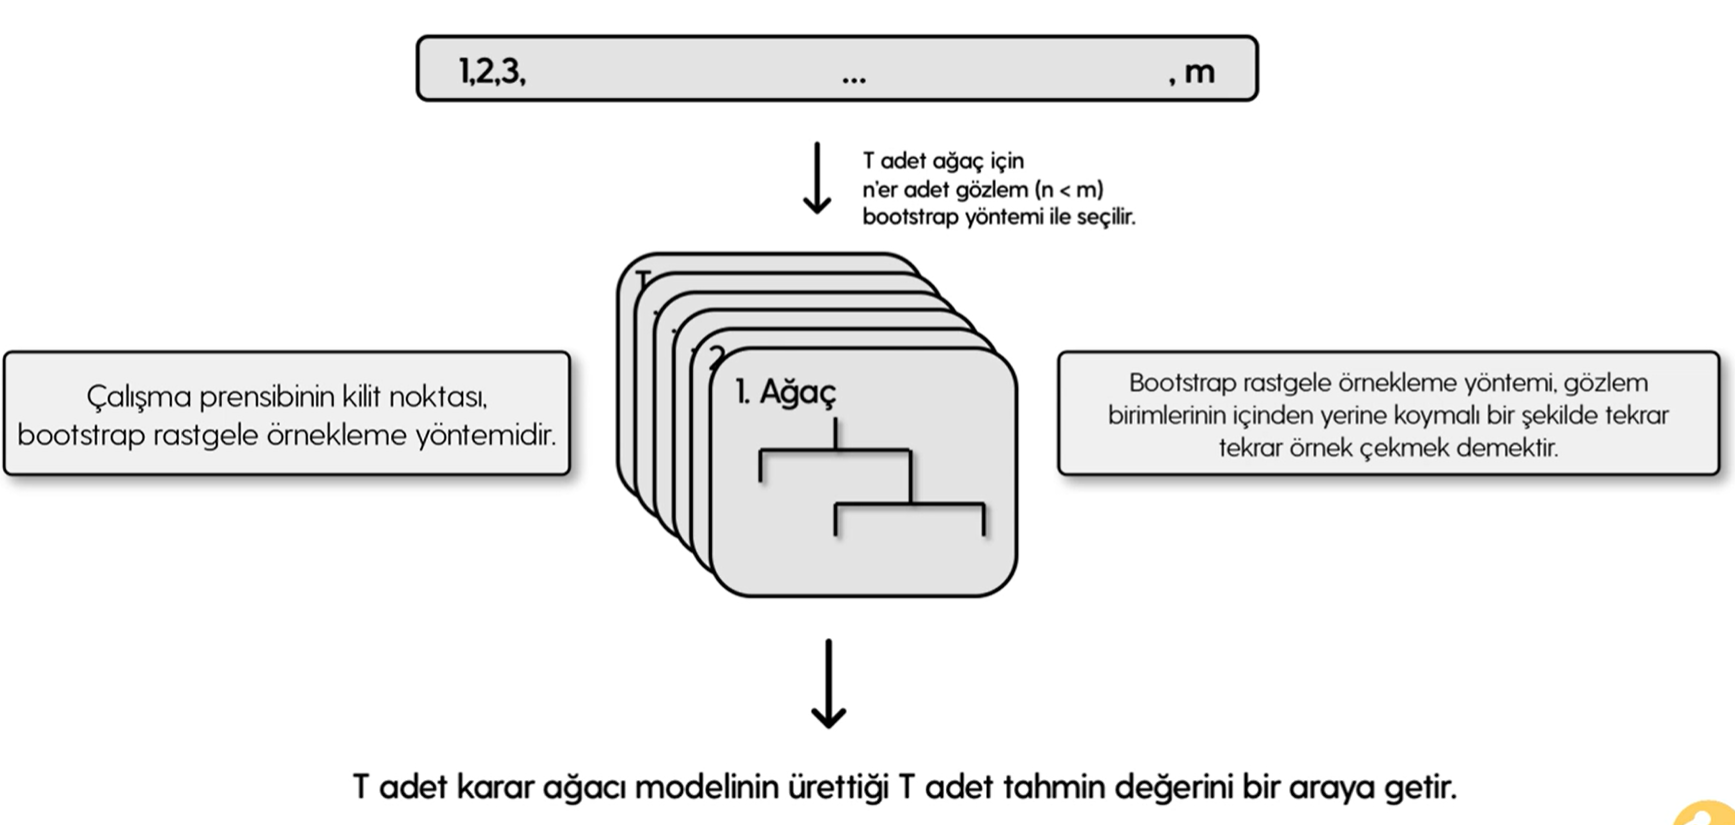

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [5]:
rf_model = RandomForestRegressor(random_state = 42).fit(x_train,y_train)

In [8]:
rf_model # n_estimators=10 kullanılan ağaç sayısı

RandomForestRegressor(random_state=42)

In [11]:
y_pred = rf_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

In [13]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200,500,1000,2000],
            "min_samples_split": [2,10,80,100]}

In [15]:
# rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs= -1, verbose= 2).fit(x_train,y_train)

In [1]:
# rf_model.best_params_

In [16]:
rf_model = RandomForestRegressor(random_state= 42,max_depth=8,
                                max_features=2,
                               n_estimators=200,
                             min_samples_split=2 )
rf_tuned= rf_model.fit(x_train,y_train)

In [17]:
y_pred= rf_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

349.1649379391149

In [21]:
# Değişken Önem Düzeyi

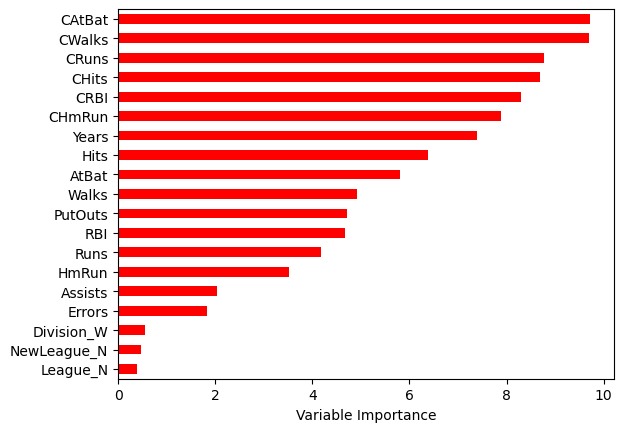

In [21]:
Importance= pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},
                        index= x_train.columns)
Importance.sort_values(by= 'Importance',
                      axis=0,
                      ascending= True).plot(kind= 'barh',
                                           color= 'r',)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Gradient Boosting Machines (GBM)

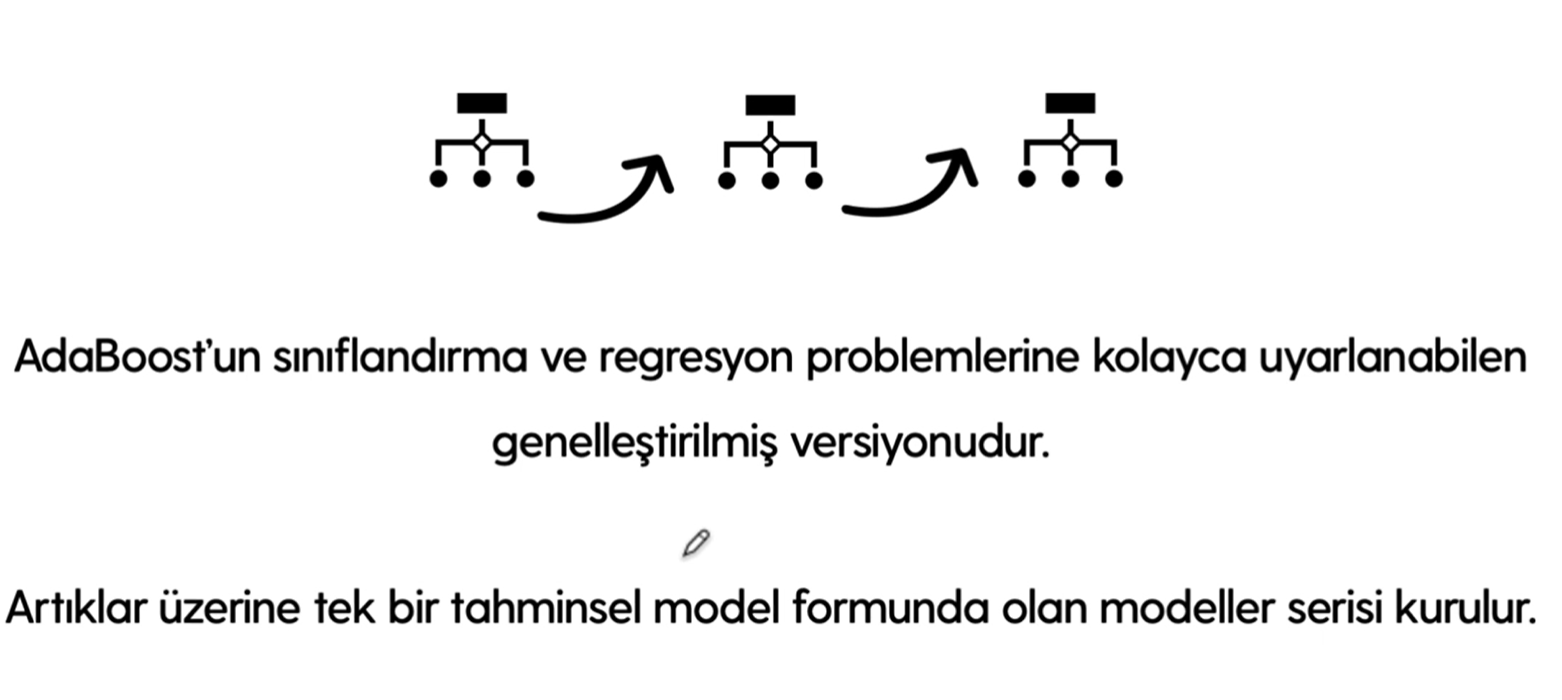

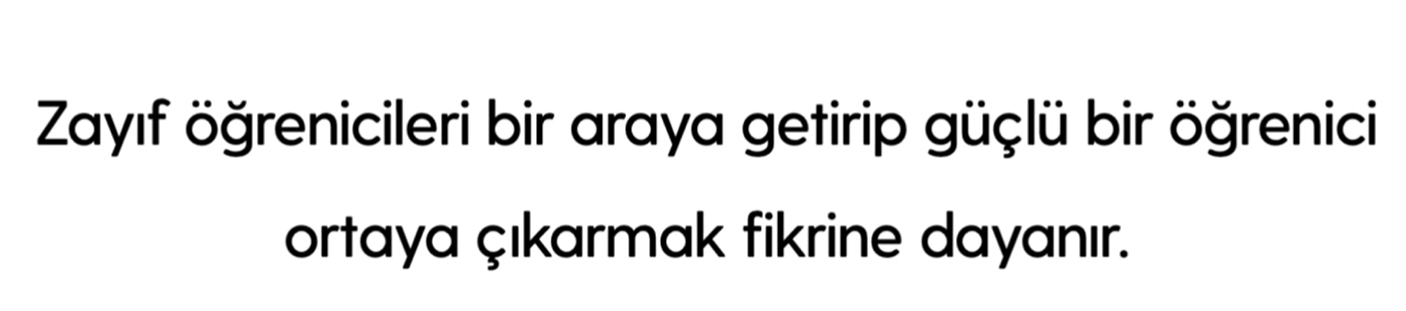

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [4]:
gbm_model = GradientBoostingRegressor().fit(x_train,y_train)

In [5]:
gbm_model

GradientBoostingRegressor()

In [6]:
y_pred= gbm_model.predict(x_test)

In [7]:
np.sqrt(mean_squared_error(y_test,y_pred))

354.94365229708285

In [8]:
?gbm_model

In [9]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
             "subsample":[1,0.5,0.8],
             "loss":["ls","lad","quantile"]}

In [10]:
# gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

In [11]:
# gbm_cv_model.best_params_

In [16]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1,
                                     max_depth=3,
                                     n_estimators=200,
                                     subsample=1).fit(x_train,y_train)

In [17]:
y_pred = gbm_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

353.7678182418212

In [19]:
# değişken önem düzeyi

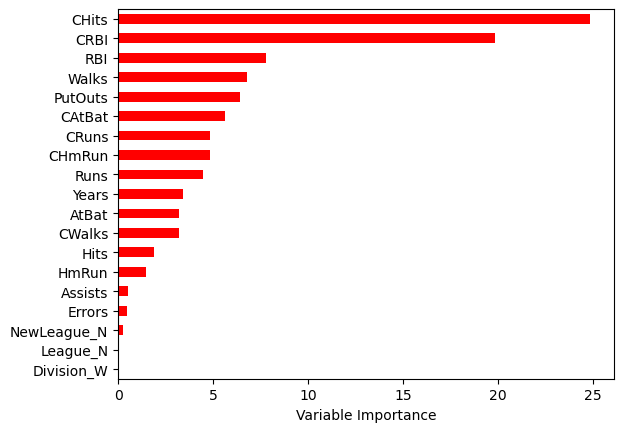

In [20]:
Importance= pd.DataFrame({'Importance': gbm_tuned.feature_importances_*100},
                        index= x_train.columns)
Importance.sort_values(by= 'Importance',
                      axis=0,
                      ascending= True).plot(kind= 'barh',
                                           color= 'r',)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# XGBoost

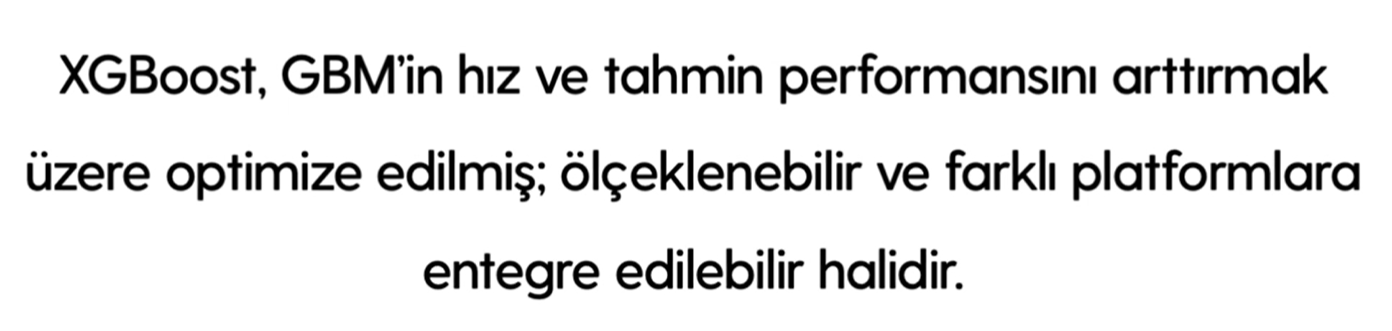

In [5]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.2/99.8 MB 2.1 MB/s eta 0:00:49
   ---------------------------------------- 0.6/99.8 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 1.0/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 1.4/99.8 MB 5.4 MB/s eta 0:00:19
    --------------------------------------- 1.8/99.8 MB 5.9 MB/s eta 0:00:17
    --------------------------------------- 2.2/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 2.4/99.8 MB 6.4 MB/s eta 0:00:16
   - --------------------------------

In [6]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
xgb = XGBRegressor().fit(x_train,y_train)

In [8]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
y_pred = xgb.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

366.3863437634965

In [11]:
xgb_params = {"learning_rate" :[0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}

In [14]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [15]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [16]:
xgb_tuned = XGBRegressor(learning_rate=0.5,max_depth=2,n_estimators=100,colsample_bytree=0.4).fit(x_train,y_train)

In [17]:
y_pred = xgb_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

355.8831191760014

# Light GBM

In [5]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 393.8 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.3 MB 655.4 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.3 MB 833.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.3 MB 981.9 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.3 MB 1.2 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.3 MB 1.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.3 MB 1.6 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 2.1 MB/s eta 0:00:01
   ------------------------ -----------

In [6]:
conda insatll -c conda-forge lightgbm


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [--no-plugins] [-V] COMMAND ...
conda-script.py: error: argument COMMAND: invalid choice: 'insatll' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'build', 'content-trust', 'convert', 'debug', 'develop', 'doctor', 'index', 'inspect', 'metapackage', 'render', 'skeleton', 'env', 'token', 'repo', 'pack', 'verify', 'server')


In [7]:
from lightgbm import LGBMRegressor

In [4]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [8]:
lgb_model = LGBMRegressor().fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

  File "C:\Users\mehdi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


In [9]:
lgb_model

LGBMRegressor()

In [10]:
y_pred = lgb_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

In [11]:
lgbm_params = {"learning_rate": [0.01,0.1,0.5,1],
              "n_estimatrors": [20,40,100,200,500,1000],
              "max_depth": [1,2,3,4,5,6,7,8,9,10]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10,n_jobs=-1 , verbose=2).fit(x_train,y_train)

In [ ]:
lgbm_cv_model.best_params_

In [15]:
lgbm_tuned= LGBMRegressor(learning_rate=0.1,n_estimatrors=20, max_depth=6).fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: n_estimatrors
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: n_estimatrors
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [16]:
y_pred = lgbm_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

[LightGBM] [Warning] Unknown parameter: n_estimatrors
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


363.9551119133454

# CatBoost

In [18]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e8/37/3afd3c02798734efcd7840bfa872d3efc06f5d5c92f9613fea3ff5b4311f/catboost-1.2.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/de/5e/fcbb22c68208d39edff467809d06c9d81d7d27426460ebc598e55130c1aa/graphviz-0.20.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 435.7 kB/s eta 0:03:52
   ---------------------------------------- 0.1/101.1 MB 762.6 kB/s eta 0:02:13
   ---------------------------------------- 0.1/101.1 MB 798.9 kB/s eta 0:02:07
   ---------------------------------------- 0.2/101.1 MB 1.3 MB/s eta 0:01:21
   ---------------------------------------- 0.4/101.1 MB 1.6 MB/s eta 0:01:02
   ---------------------------------------- 0.5/10

In [20]:
from catboost import CatBoostRegressor

In [19]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

y = data["Salary"]

x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [21]:
catb_model= CatBoostRegressor().fit(x_train,y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 129ms	remaining: 2m 8s
1:	learn: 431.3923642	total: 135ms	remaining: 1m 7s
2:	learn: 424.8820360	total: 141ms	remaining: 46.8s
3:	learn: 418.2514904	total: 147ms	remaining: 36.7s
4:	learn: 412.6394021	total: 153ms	remaining: 30.5s
5:	learn: 406.6247020	total: 159ms	remaining: 26.4s
6:	learn: 400.5321206	total: 165ms	remaining: 23.4s
7:	learn: 394.6683437	total: 169ms	remaining: 20.9s
8:	learn: 388.2496484	total: 173ms	remaining: 19s
9:	learn: 382.9448842	total: 177ms	remaining: 17.5s
10:	learn: 377.2600080	total: 181ms	remaining: 16.3s
11:	learn: 372.4829606	total: 185ms	remaining: 15.2s
12:	learn: 366.6823437	total: 193ms	remaining: 14.6s
13:	learn: 362.6076230	total: 197ms	remaining: 13.9s
14:	learn: 358.0107745	total: 201ms	remaining: 13.2s
15:	learn: 353.2802665	total: 206ms	remaining: 12.6s
16:	learn: 348.5646265	total: 210ms	remaining: 12.2s
17:	learn: 343.6407912	total: 214ms	remaining: 11.7s
18:	learn: 339.2363847	total

In [22]:
y_pred = catb_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

351.194631344607

In [28]:
catb_params = {
    "iterations": [200, 500, 1000],
    "learning_rate": [0.01, 0.1],
    "depth": [3, 6, 8]
}

In [29]:
catb_model = CatBoostRegressor()

In [30]:
#catb_cv_model = GridSearchCV(catb_model,catb_params,cv=5,n_jobs=-1,verbose=2)

In [31]:
#catb_cv_model.best_params_

In [38]:
# catb_tuned = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=3).fit(x_train, y_train)

In [35]:
y_pred = catb_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

336.40041748521486

# automatic

In [39]:
data = pd.read_csv("C:\\Users\\mehdi\\Downloads\\Hitters.csv")
data=data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])

In [64]:
def compML(data, y, alg):
    #train-test ayrimi
    y = data[y]

    x_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

    x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    
    #modelleme
    model = alg().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi= alg.__name__
    print(model_ismi ,"Modelin Test Hatası:", RMSE)

In [65]:
compML(data, "Salary", MLPRegressor)

MLPRegressor Modelin Test Hatası: 424.53794075883513


In [69]:
models = [LGBMRegressor,
         XGBRegressor,
         SVR,
         KNeighborsRegressor,
         GradientBoostingRegressor,
         RandomForestRegressor,
         MLPRegressor,
         KNeighborsRegressor,
         DecisionTreeRegressor]

In [70]:
for i in models:
    print(compML(data, "Salary", i))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 